In [294]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import os
from pykrx import stock
from datetime import datetime
from platform import python_version
print(python_version())
print(pd.__version__)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
mpl.rc('font', family='Malgun Gothic')
mpl.__version__

file_path = './stock.csv'
pre = pd.read_csv(file_path, encoding='EUC-KR')

start = '20211231'
end = '20221231'
year = 1

3.10.8
1.5.2


In [295]:
def code(x):
    y = pre[pre['한글 종목약명'].isin([x])].iloc[0,1]
    return y

In [296]:
name_1 = ['삼성전자', 'SK하이닉스', 'NAVER', 'LG화학', '카카오',
         '삼성SDI', '현대차', '기아', '셀트리온', 'POSCO홀딩스', '에코프로비엠', '엘앤에프', 
         'HLB', '카카오게임즈', '펄어비스', '에코프로', '알테오젠', '천보', 'JYP Ent.', '스튜디오드래곤', 
         'SK리츠', 'ESR켄달스퀘어리츠', '코람코에너지리츠', '제이알글로벌리츠', '롯데리츠', '신한알파리츠']

skr = ['SK리츠']
code_1 =[]

for x in name_1:
    code_1.append(code(x))


In [297]:
def chart(name, code):
    from time import sleep
    l = len(code)
    y = pd.DataFrame(columns=name)
    for x in range(0, l):
        y[name[x]] = stock.get_market_ohlcv_by_date(start, end, code[x]).iloc[:,3]
        sleep(3)
    return y

In [298]:
df = chart(name_1, code_1)

## 여기서부턴 KRX 요청량 없음

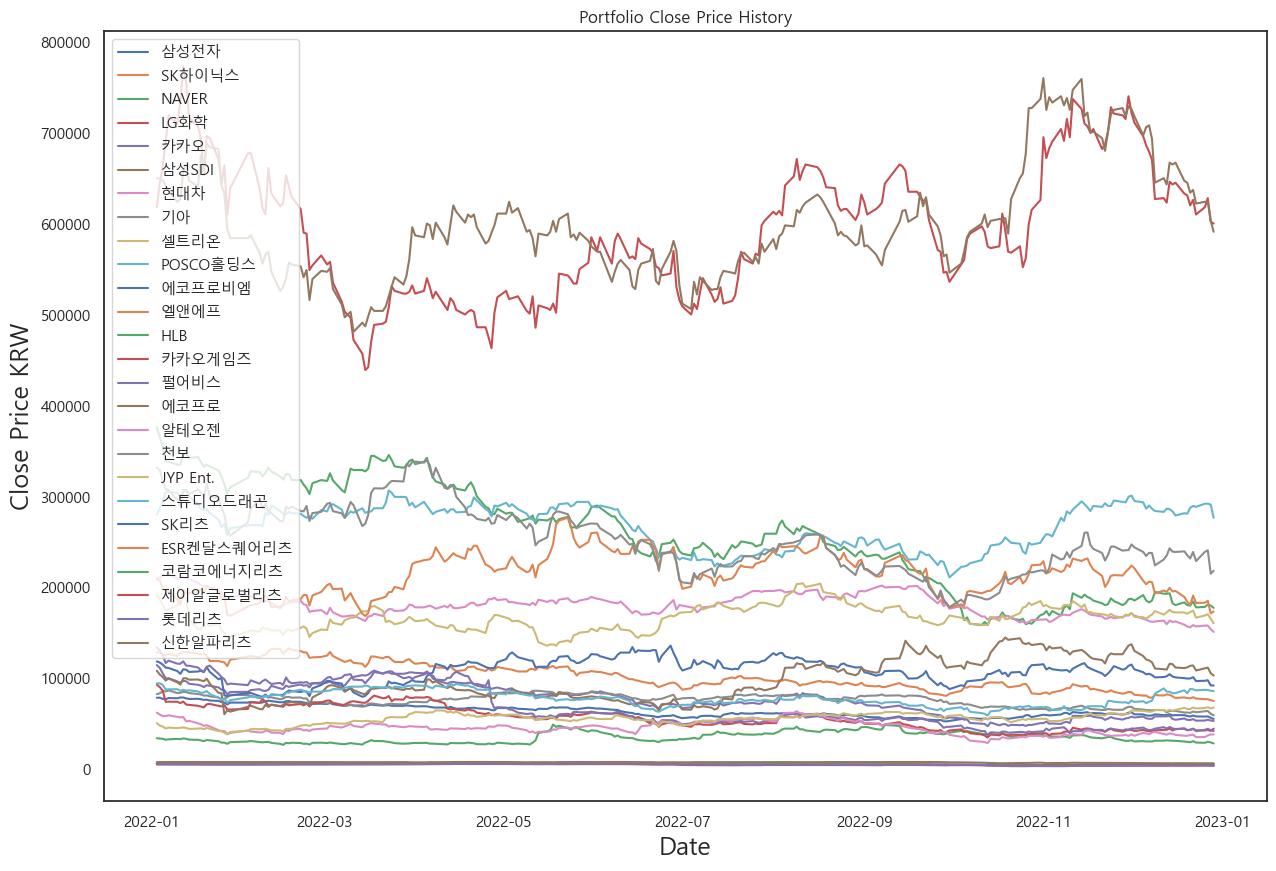

In [299]:
title = 'Portfolio Close Price History'
my_stocks = df
plt.figure(figsize=(15, 10))

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price KRW', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [300]:
df_new = my_stocks.pct_change()
df_new.head()

,삼성전자,SK하이닉스,NAVER,LG화학,카카오,삼성SDI,현대차,기아,셀트리온,POSCO홀딩스,...,알테오젠,천보,JYP Ent.,스튜디오드래곤,SK리츠,ESR켄달스퀘어리츠,코람코에너지리츠,제이알글로벌리츠,롯데리츠,신한알파리츠
날짜,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.001272,0.000000,-0.027926,0.042071,-0.026201,-0.001538,-0.002375,0.010896,-0.020151,0.023214,...,-0.033523,-0.006938,-0.052268,0.000000,-0.011254,-0.012598,0.001401,-0.003765,-0.010870,-0.001135
2022-01-05,-0.016518,-0.023346,-0.028728,0.031056,-0.053812,-0.001541,0.016667,0.028743,-0.035990,0.031414,...,-0.027735,-0.035844,-0.022893,-0.017989,0.001626,0.003190,0.006218,-0.001701,0.007326,0.002399
2022-01-06,-0.006460,-0.003984,-0.046479,0.039157,-0.052133,-0.009259,0.002342,-0.003492,-0.034665,0.030457,...,0.001419,-0.030246,-0.044728,-0.054957,-0.003247,-0.012719,0.007570,0.000000,0.000000,0.000000
2022-01-07,0.018205,0.016000,-0.001477,0.042029,0.000000,-0.009346,0.004673,0.012850,0.008288,0.001642,...,0.012826,-0.001949,0.020067,0.002281,0.008143,0.017713,-0.007513,0.005489,-0.001818,-0.003653


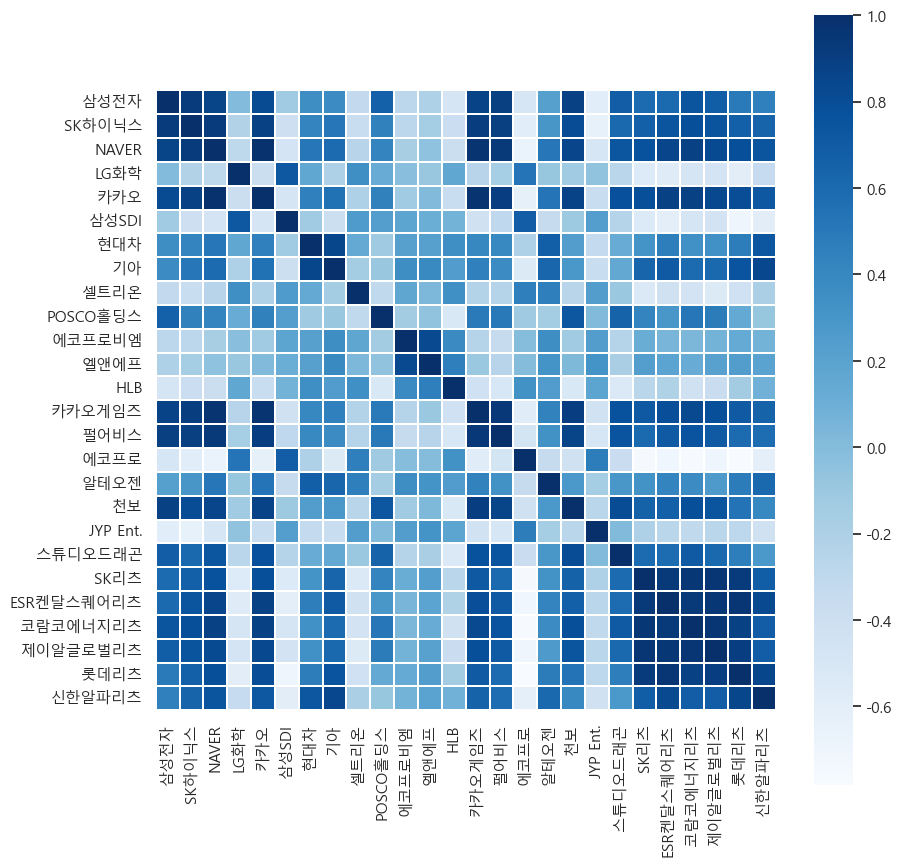

In [301]:
corrmat = df_new.corr()
cov = df_new.cov()
plt.figure(figsize=(10,10))
cm = np.corrcoef(df.values.T)
hm = sns.heatmap(cm, cmap='Blues', cbar=True, square=True, fmt='.2f',
                 linewidths=0.01, xticklabels=df.columns, yticklabels=df.columns)
plt.show()

In [302]:
def ret(list):
    from copy import deepcopy
    tmp = deepcopy(my_stocks)
    tmp.columns = [code(x) for x in my_stocks.columns]
    l = len(list)
    y = []
    for x in range(0, l):
        re = tmp[list[x]][-1] / tmp[list[x]][0]
        y.append(re)
    return y

In [303]:
weight_1 = np.array([1/len(name_1) for i in name_1])

port_var = np.dot(weight_1.T, np.dot(cov, weight_1))
port_std = np.sqrt(port_var) * np.sqrt(252)
port_SAR = (np.mean(ret(code_1)))-1
# port_SAR = np.sum(df_new.mean()*weight_1) * 247

per_var = str(round(port_var, 4) * 100) +'%'
per_vols = str(round(port_std, 4) * 100) +'%'
per_ret = str(round(port_SAR, 4) * 100) +'%'
sr = str(round(port_SAR/port_std, 2))

print('Expected annual return:'+ per_ret)
print('Annual volatility:' + per_vols)
print('Sharpe Ratio:' + sr)

Expected annual return:-23.98%
Annual volatility:23.03%
Sharpe Ratio:-1.04


In [304]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('삼성전자', 0.0), ('SK하이닉스', 0.0), ('NAVER', 0.0), ('LG화학', 0.0), ('카카오', 0.0), ('삼성SDI', 0.0), ('현대차', 0.0), ('기아', 0.0), ('셀트리온', 0.0), ('POSCO홀딩스', 0.0), ('에코프로비엠', 0.0), ('엘앤에프', 0.0), ('HLB', 0.0), ('카카오게임즈', 0.0), ('펄어비스', 0.0), ('에코프로', 0.0), ('알테오젠', 0.0), ('천보', 0.0), ('JYP Ent.', 1.0), ('스튜디오드래곤', 0.0), ('SK리츠', 0.0), ('ESR켄달스퀘어리츠', 0.0), ('코람코에너지리츠', 0.0), ('제이알글로벌리츠', 0.0), ('롯데리츠', 0.0), ('신한알파리츠', 0.0)])
Expected annual return: 34.8%
Annual volatility: 42.5%
Sharpe Ratio: 0.77


(0.34842895559628384, 0.42521158889237504, 0.7723894742657454)

100%|██████████| 5000/5000 [00:40<00:00, 124.57it/s]


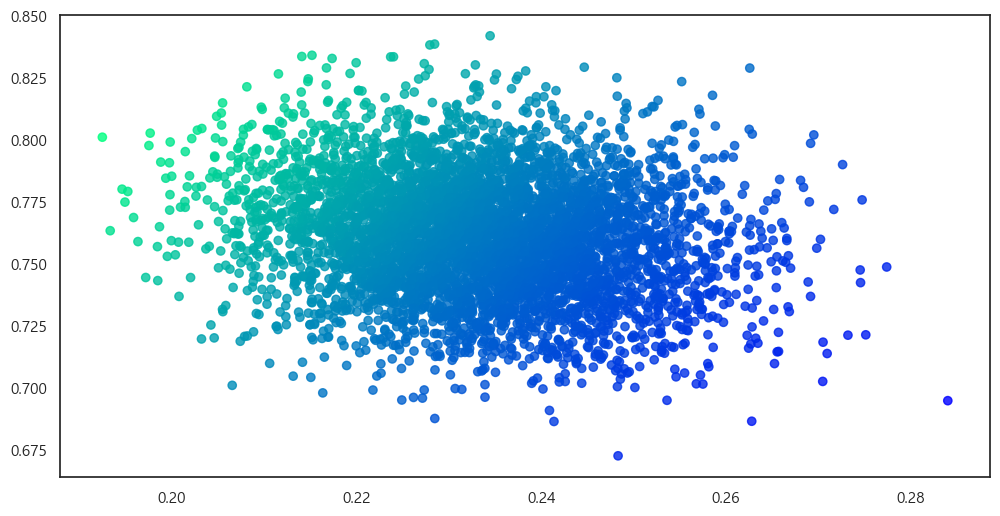

In [305]:
def ef(list):
    from tqdm import tqdm
    simulation = []
    pr = []
    pvol = []
    for i in tqdm(range(5000)):
        weight = np.random.random(len(list))
        weight = weight/np.sum(weight)

        pr.append(np.dot(weight, np.array(ret(code_1))**(1/year)).sum())
        pvol.append(np.sqrt(np.dot(weight.T, np.dot(cov, weight)))*np.sqrt(252))

    plt.figure(figsize=(12,6))
    plt.scatter(pvol, pr, c=np.array(pr)/np.array(pvol), cmap='winter', marker='o', alpha=0.8)

ef(code_1)

## 리츠없이!!

In [306]:
from copy import deepcopy
my_stocks = deepcopy(df.iloc[:,:-6])
my_stocks.head()

,삼성전자,SK하이닉스,NAVER,LG화학,카카오,삼성SDI,현대차,기아,셀트리온,POSCO홀딩스,에코프로비엠,엘앤에프,HLB,카카오게임즈,펄어비스,에코프로,알테오젠,천보,JYP Ent.,스튜디오드래곤
날짜,,,,,,,,,,,,,,,,,,,,
2022-01-03,78600,128500,376000,618000,114500,650000,210500,82600,191210,280000,118600,208500,34138,93000,134000,108303,62226,331500,50700,94500
2022-01-04,78700,128500,365500,644000,111500,649000,210000,83500,187357,286500,117364,207600,33762,90300,130500,104126,60140,329200,48050,94500
2022-01-05,77400,125500,355000,664000,105500,648000,213500,85900,180614,295500,115017,198400,33526,86400,125800,101504,58472,317400,46950,92800
2022-01-06,76900,125000,338500,690000,100000,642000,214000,85600,174353,304500,111805,195700,32445,74100,116800,97521,58555,307800,44850,87700
2022-01-07,78300,127000,338000,719000,100000,636000,215000,86700,175798,305000,111385,196600,32915,74300,119400,99853,59306,307200,45750,87900


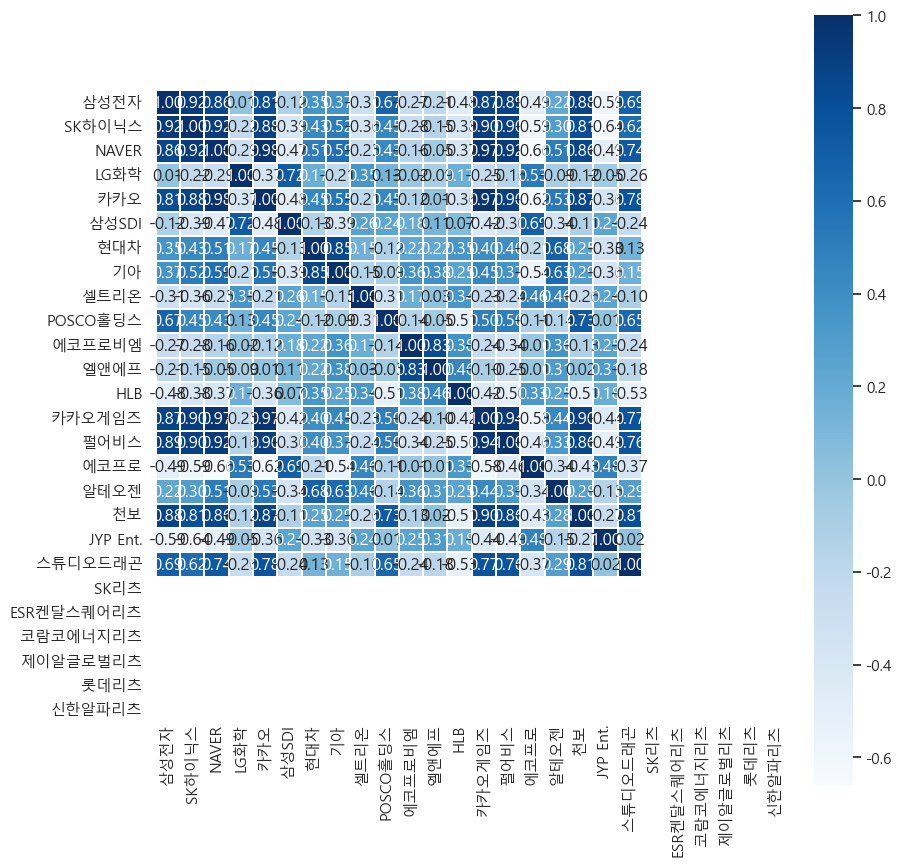

In [307]:
df_new = my_stocks.pct_change()
corrmat = df_new.corr()
cov = df_new.cov()
plt.figure(figsize=(10,10))
cm = np.corrcoef(my_stocks.values.T)
hm = sns.heatmap(cm, cmap='Blues', cbar=True, annot=True, square=True, fmt='.2f',
                 linewidths=0.01, xticklabels=df.columns, yticklabels=df.columns)
plt.show()


In [308]:
weight_1 = np.array([1/len(name_1) for i in range(20)])

port_var = np.dot(weight_1.T, np.dot(cov, weight_1))
port_std = np.sqrt(port_var) * np.sqrt(252)
port_SAR = (np.mean(ret(code_1[:-6])))-1
# port_SAR = np.sum(df_new.mean()*weight_1) * 247

per_var = str(round(port_var, 4) * 100) +'%'
per_vols = str(round(port_std, 4) * 100) +'%'
per_ret = str(round(port_SAR, 4) * 100) +'%'
sr = str(round(port_SAR/port_std, 2))

print('Expected annual return:'+ per_ret)
print('Annual volatility:' + per_vols)
print('Sharpe Ratio:' + sr)

Expected annual return:-24.65%
Annual volatility:21.17%
Sharpe Ratio:-1.16


In [309]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

mu = expected_returns.mean_historical_return(my_stocks)
S = risk_models.sample_cov(my_stocks)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('삼성전자', 0.0), ('SK하이닉스', 0.0), ('NAVER', 0.0), ('LG화학', 0.0), ('카카오', 0.0), ('삼성SDI', 0.0), ('현대차', 0.0), ('기아', 0.0), ('셀트리온', 0.0), ('POSCO홀딩스', 0.0), ('에코프로비엠', 0.0), ('엘앤에프', 0.0), ('HLB', 0.0), ('카카오게임즈', 0.0), ('펄어비스', 0.0), ('에코프로', 0.0), ('알테오젠', 0.0), ('천보', 0.0), ('JYP Ent.', 1.0), ('스튜디오드래곤', 0.0)])
Expected annual return: 34.8%
Annual volatility: 42.5%
Sharpe Ratio: 0.77


(0.34842895559628384, 0.42521158889237504, 0.7723894742657454)

100%|██████████| 5000/5000 [00:30<00:00, 162.98it/s]


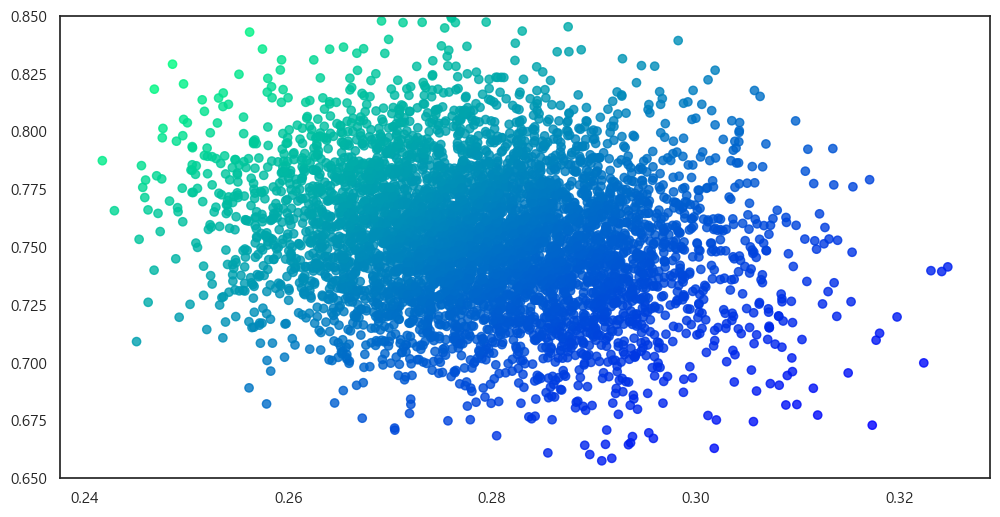

In [310]:
def ef(list):
    from tqdm import tqdm
    simulation = []
    pr = []
    pvol = []
    for i in tqdm(range(5000)):
        weight = np.random.random(len(list))
        weight = weight/np.sum(weight)

        pr.append(np.dot(weight, np.array(ret(code_1[:-6]))**(1/year)).sum())
        pvol.append(np.sqrt(np.dot(weight.T, np.dot(cov, weight)))*np.sqrt(252))

    plt.figure(figsize=(12,6))
    plt.ylim([0.65,0.85])
    plt.scatter(pvol, pr, c=np.array(pr)/np.array(pvol), cmap='winter', marker='o', alpha=0.8)

ef(code_1[:-6])

## 직접 비교

In [311]:
def compare_ef(df_1, df_2, cov_1, cov_2, code_1, code_2):
    from tqdm import tqdm
    simulation_1 = []
    simulation_2 = []

    pr_1 = []
    pvol_1 = []
    pr_2 = []
    pvol_2 = []

    for i in tqdm(range(5000)):
        weight_1 = np.random.random(len(df_1.columns))
        weight_1 = weight_1/np.sum(weight_1)
        weight_2 = np.random.random(len(df_2.columns))
        weight_2 = weight_2/np.sum(weight_2)

        pr_1.append(np.dot(weight_1, np.array(ret(code_1))).sum())
        pvol_1.append(np.sqrt(np.dot(weight_1.T, np.dot(cov_1, weight_1)))*np.sqrt(252))
        pr_2.append(np.dot(weight_2, np.array(ret(code_2))).sum())
        pvol_2.append(np.sqrt(np.dot(weight_2.T, np.dot(cov_2, weight_2)))*np.sqrt(252))

    plt.figure(figsize=(12,6))
    plt.scatter(pvol_1, pr_1, c=np.array(pr_1)/np.array(pvol_1), cmap='hot', marker='o', alpha=0.5)
    plt.scatter(pvol_2, pr_2, c=np.array(pr_2)/np.array(pvol_2), cmap='winter', marker='o', alpha=0.5)

stock = df
reitz = df.iloc[:,:-6]
cov_stock = stock.pct_change().cov()
cov_reitz = reitz.pct_change().cov()
stock_code = code_1
reitz_code = code_1[:-6]

compare_ef(stock,reitz, cov_stock, cov_reitz, stock_code, reitz_code)

  0%|          | 0/5000 [00:00<?, ?it/s]


KeyError: '395400'

## 분기별

In [ ]:
oneq = df[df.index<='2022-03-31']

twoq = df[df.index>'2022-03-31']
twoq = twoq[twoq.index<='2022-06-30']

threeq = df[df.index>'2022-06-30']
threeq = threeq[threeq.index<='2022-09-30']

fourq = df[df.index>'2022-09-30']

100%|██████████| 5000/5000 [01:18<00:00, 64.04it/s]


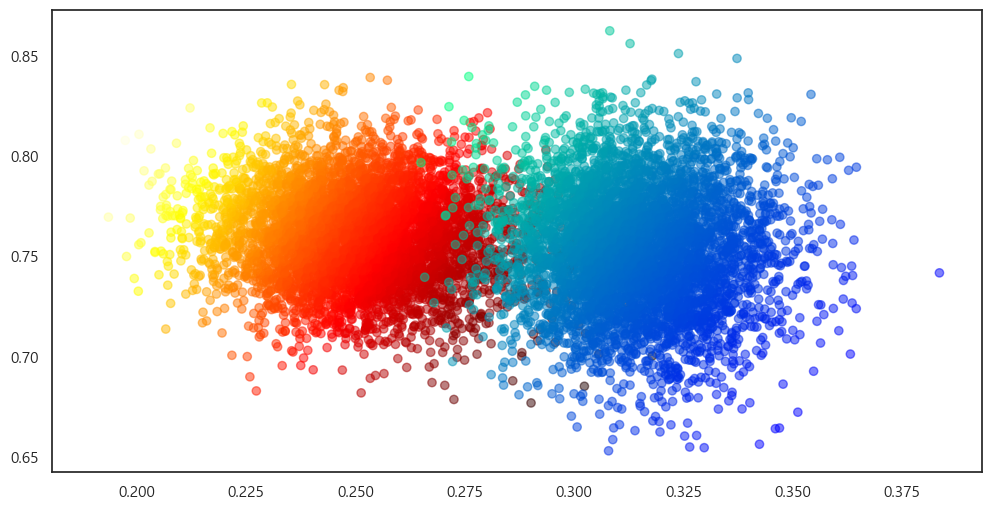

In [ ]:
# 1분기
def q_compare(df):
    stock = df
    reitz = df.iloc[:,:-6]
    cov_stock = stock.pct_change().cov()
    cov_reitz = reitz.pct_change().cov()
    stock_code = code_1
    reitz_code = code_1[:-6]

    compare_ef(stock,reitz, cov_stock, cov_reitz, stock_code, reitz_code)

q_compare(oneq)

100%|██████████| 5000/5000 [01:20<00:00, 61.80it/s]


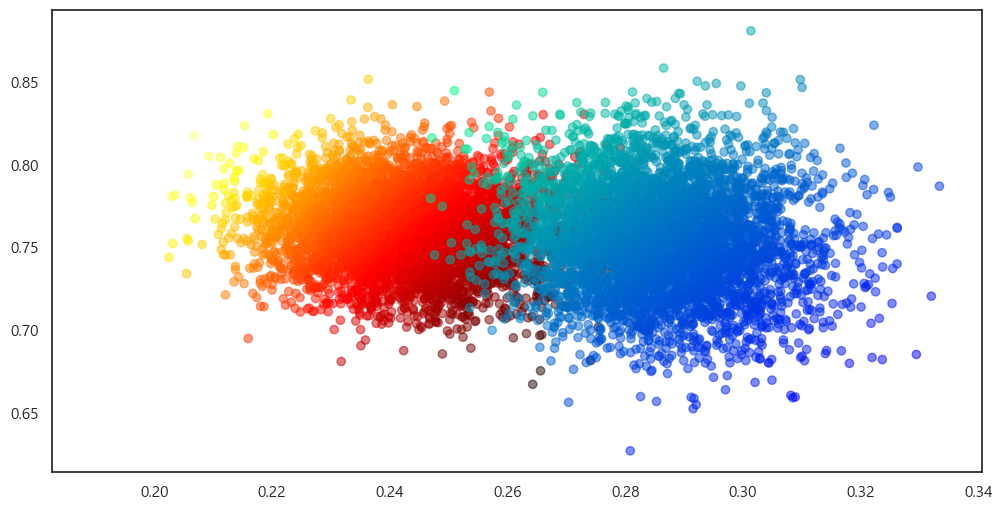

In [ ]:
# 2분기
q_compare(twoq)

100%|██████████| 5000/5000 [01:22<00:00, 60.74it/s]


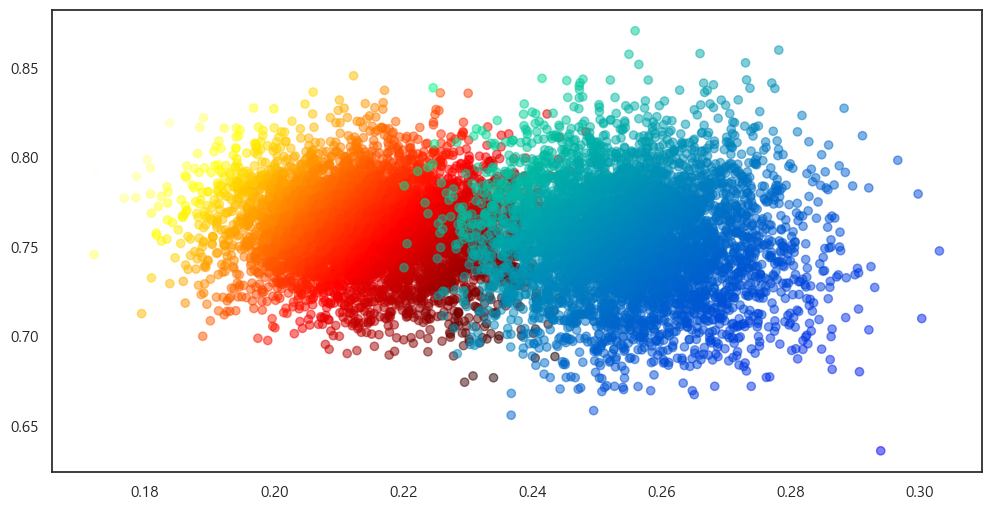

In [ ]:
# 3분기
q_compare(threeq)

100%|██████████| 5000/5000 [01:15<00:00, 65.96it/s]


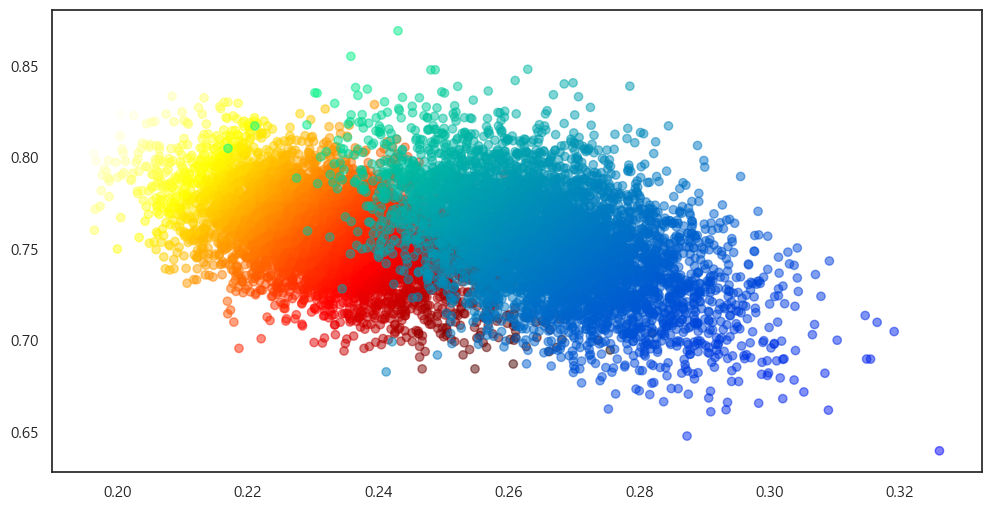

In [ ]:
# 4분기
q_compare(fourq)

## 기초 통계량

In [ ]:
base = df_new.describe().T
base = base.loc[:,['mean', 'std', 'min', 'max']]
base['median'] = df_new.median()
base

,mean,std,min,max,median
삼성전자,-0.001332,0.014362,-0.036975,0.044964,-0.001767
SK하이닉스,-0.001977,0.020924,-0.073333,0.064378,-0.003141
NAVER,-0.002771,0.024104,-0.087855,0.099432,-0.004539
LG화학,0.000333,0.030299,-0.081325,0.110224,-0.003478
카카오,-0.002770,0.027153,-0.071168,0.155512,-0.003407
삼성SDI,-0.000075,0.025068,-0.069264,0.073855,0.000000
현대차,-0.001225,0.016117,-0.056452,0.057803,0.000000
기아,-0.001198,0.017519,-0.061050,0.048995,0.000000
셀트리온,-0.000409,0.024678,-0.123079,0.080386,0.000000
POSCO홀딩스,0.000144,0.019847,-0.049828,0.080078,-0.001669


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

kospi = pd.read_csv('KOSPI.csv', encoding='EUC-KR')
kosdaq = pd.read_csv('KOSDAQ.csv', encoding='EUC-KR')
krxbond = pd.read_csv('KRX채권.csv', encoding='EUC-KR')

kospi.tail()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
241,2022/01/07,390.85,4.63,1.20,388.30,391.75,388.06,114277.0,8111558.0,1.884682e+09
242,2022/01/06,386.22,-4.17,-1.07,386.59,390.51,385.30,152387.0,9949713.0,1.862775e+09
243,2022/01/05,390.39,-5.01,-1.27,394.91,395.20,387.56,175489.0,11706292.0,1.883409e+09
244,2022/01/04,395.40,-0.11,-0.03,396.01,396.71,393.35,117161.0,7335075.0,1.908027e+09
245,2022/01/03,395.51,1.32,0.33,397.16,399.44,394.26,97581.0,5916888.0,1.909560e+09


In [ ]:
tmp_dict = {}
tmp_dict['코스피'] = kospi['종가']
tmp_dict['코스닥'] = kosdaq['종가']

bm = pd.DataFrame(tmp_dict).loc[::-1]
bm.index = kospi['일자'][::-1]
bm.head()

bm_new = bm.pct_change()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

ModuleNotFoundError: No module named 'sklearn'

In [319]:
skr = df['SK리츠']
kospi = pd.read_csv('KOSPI.CSV', encoding='EUC-KR')
kosdaq = pd.read_csv('KOSDAQ.csv', encoding='EUC-KR')
stock = pd.read_csv('stock.csv', encoding='EUC-KR')
kospi = np.array(kospi.iloc[::-1]['종가'])
kosdaq = np.array(kosdaq.iloc[::-1]['종가'])

In [324]:
cdf = pd.DataFrame({
    'SK리츠': skr,
    '코스피': kospi,
    '코스닥': kosdaq
})

def get_mdd(x):
    arr_v = np.array(x)
    peak_lower = np.argmax(np.maximum.accumulate(arr_v) - arr_v)
    peak_upper = np.argmax(arr_v[:peak_lower])
    return (arr_v[peak_lower]-arr_v[peak_upper])/arr_v[peak_upper]

get_mdd(cdf['SK리츠'])

-0.39697802197802196

In [361]:
sol = pd.DataFrame()
kospi_re = kospi[-1]/kospi[0]-1
kosdaq_re = kosdaq[-1]/kosdaq[0]-1
sk_re = skr[-1]/skr[0]-1

cdf_pct = cdf.pct_change()
cdv_cov = cdf_pct.cov()

skkoscov = np.array(cdv_cov.iloc[:2,:2])

for i in range(0,55,5):
    weight = np.array([i, 100-i])
    tmp_var = np.dot(weight.T, np.dot(skkoscov, weight))
    tmp_std = np.sqrt(tmp_var) * np.sqrt(252)
    tmp_sar = kospi_re * weight[1] + sk_re * weight[0]


    sol[f'{i}%'] = [round(tmp_sar,2), round(tmp_std,2)]

In [362]:
sol = sol.T
sol[2] = round(sol[0]/sol[1],2)

In [363]:
sol.columns = ['수익률', '표준편차', 'Sharpe Ratio']

In [364]:
sol

,수익률,표준편차,Sharpe Ratio
0%,-26.40,19.24,-1.37
5%,-25.65,18.65,-1.38
10%,-24.90,18.15,-1.37
15%,-24.15,17.75,-1.36
20%,-23.40,17.46,-1.34
25%,-22.65,17.27,-1.31
30%,-21.90,17.20,-1.27
35%,-21.15,17.24,-1.23
40%,-20.41,17.39,-1.17
45%,-19.66,17.66,-1.11


In [368]:
dsol = pd.DataFrame()

cc = cdv_cov.drop('코스피', axis=0)
cc = cc.drop('코스피', axis=1)
skkoscov = np.array(cc)

for i in range(0,55,5):
    weight = np.array([i, 100-i])
    tmp_var = np.dot(weight.T, np.dot(skkoscov, weight))
    tmp_std = np.sqrt(tmp_var) * np.sqrt(252)
    tmp_sar = kosdaq_re * weight[1] + sk_re * weight[0]

    dsol[f'{i}%'] = [round(tmp_sar,2), round(tmp_std,2)]

dsol = dsol.T
dsol[2] = round(dsol[0]/dsol[1],2)
dsol.columns = ['수익률', '표준편차', 'Sharpe Ratio']

dsol

[-37.07, 31.36]
[-35.78, 30.18]
[-34.5, 29.05]
[-33.22, 27.99]
[-31.94, 27.0]
[-30.65, 26.08]
[-29.37, 25.25]
[-28.09, 24.52]
[-26.81, 23.89]
[-25.52, 23.37]
[-24.24, 22.97]


,수익률,표준편차,Sharpe Ratio
0%,-37.07,31.36,-1.18
5%,-35.78,30.18,-1.19
10%,-34.50,29.05,-1.19
15%,-33.22,27.99,-1.19
20%,-31.94,27.00,-1.18
25%,-30.65,26.08,-1.18
30%,-29.37,25.25,-1.16
35%,-28.09,24.52,-1.15
40%,-26.81,23.89,-1.12
45%,-25.52,23.37,-1.09
